# Assignment 02: Import and Analyze Geospatial Datasets in Python (Part 2)
## GIS 5092: Applied Machine Learning for GIS and Remote Sensing (Fall 2022)

# IMPORTANT
Whenever you want to keep a copy of this notebook, remember to sign in with your appropriate google account (SLU Google Account is suggested), and save a copy of it in your preferred Google Drive location (preferable location is a seperate folder in your Google Drive for seperate projects, also avoid spaces in folder/file names).

# How to submit?
Write your answers in places where you see **YOUR ANSWER HERE** within the **#### ... ####** comments. If your answer is code, then use the Code cell, if its text, then use the Text cell. Save a copy of this notebook in your Google Drive by replacing the STUDENT with your SURNAME in CAPS. Then Download the notebook in your computer's hard drive by doing <code>File > Download > Download .ipynb </code>.



---



---



---



**Q10.** Calculate the Mean NDVI of Counties near Saint Louis city using Landsat 8 OLI image.  

You will find two different datasets in the <code>lab2</code> folder for this task:
1. LC08_L2SP_024033_20201016_20201105_02_T1_SR_Composite.tif
2. Counties.shp
and some of their associated files.

The landsat 08 image is a composite of 7 channels with 30m spatial resolution. More information of what bands represents what part of the spectrum can be found in [here](https://www.usgs.gov/faqs/what-are-band-designations-landsat-satellites?qt-news_science_products=0#qt-news_science_products) (navigate to the Landsat 08 OLI part). The composite given in the lab folder is a stacked image from Band 1 to Band 7. The order of the image channels are represented by the order of the bands. Your tasks are the following:

* Read the image using <code>rasterio</code> and counties shapefile using <code>geopandas</code>.
* Use the code examples provided in the previous cells to mask the image based on each county feature shape and calcualte the mean NDVI for each county.
* Your final deliverable would be a <code>pandas</code> dataframe that says the county name in one column and the mean NDVI value in the other column. Also, throuout you codes, you should use necessary comments.

**Hints**
* Remember to import necessary modules, mount your drive properly to read the data from <code>lab2</code> folder.
* Utilize the <code>extract_by_mask(src, shape_geom)</code> function. After masking, you will only need the NIR channel and Red channel to calculate NDVI. Then calculate the mean NDVI.
* In the mask function from rasterio, replace the nodata value from np.nan to 0, otherwie you will receive errors.
* You have to extract the county name inside the for loop. Think about replacing the plotid in the previous example with the county name. You need to locate what column specifies the county name.

The final dataframe should look something like this.

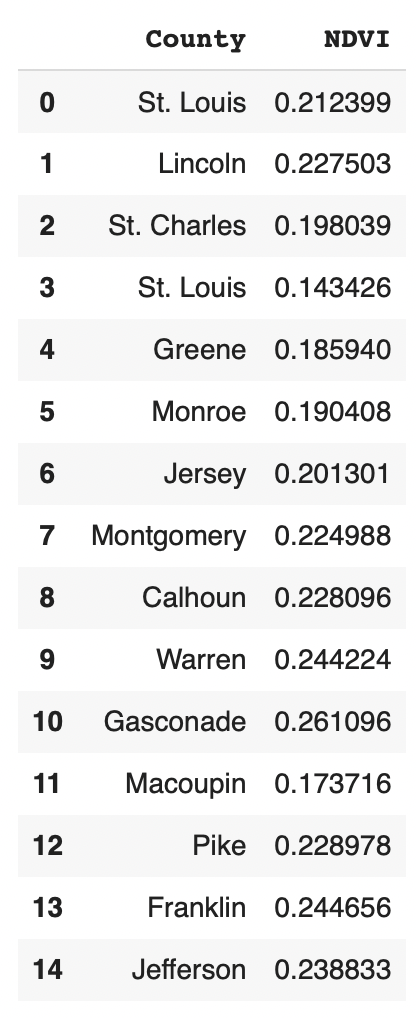



---



---



In [1]:
### Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
### Import os and make your labfolder as the current working directory

import os

os.chdir('/content/drive/MyDrive/ML/Assignmt2/lab2')



In [3]:
### Import modules
import numpy as np
# Rasterio and Geopandas
try:
    import rasterio
except:
    !pip install rasterio
    import rasterio
    from rasterio import mask

try:
    import geopandas as gpd
except:
    !pip install geopandas
    import geopandas as gpd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 43.6 MB/s eta 0:00:00


In [7]:
### Read data
src = rasterio.open('./LC08_L2SP_024033_20201016_20201105_02_T1_SR_Composite.tif')

plots = gpd.read_file('./Counties_.shp')

In [10]:
### Perform the tasks
plots

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,29,189,00758549,0500000US29189,29189,St. Louis,06,1.314229e+09,40161918.0,"POLYGON ((697471.888 4260376.424, 697477.371 4..."
1,29,113,00758511,0500000US29113,29113,Lincoln,06,1.622787e+09,36004144.0,"POLYGON ((650327.020 4319055.465, 650326.473 4..."
2,29,183,00758546,0500000US29183,29183,St. Charles,06,1.451635e+09,83330527.0,"POLYGON ((677370.650 4271931.211, 677374.102 4..."
3,29,510,00767557,0500000US29510,29510,St. Louis,25,1.599151e+08,11211123.0,"POLYGON ((733359.420 4275146.778, 733475.519 4..."
4,17,061,00424232,0500000US17061,17061,Greene,06,1.406415e+09,8423898.0,"POLYGON ((704842.552 4360343.817, 704887.833 4..."
5,17,133,01784865,0500000US17133,17133,Monroe,06,9.979085e+08,33784324.0,"POLYGON ((729684.641 4240836.432, 729676.714 4..."
6,17,083,00424243,0500000US17083,17083,Jersey,06,9.564453e+08,20311971.0,"POLYGON ((707179.124 4332561.264, 707456.762 4..."
7,29,139,00758524,0500000US29139,29139,Montgomery,06,1.385765e+09,14100635.0,"POLYGON ((617677.418 4286151.603, 617589.219 4..."
8,17,013,00424208,0500000US17013,17013,Calhoun,06,6.574029e+08,77058387.0,"POLYGON ((677655.977 4363141.130, 679394.310 4..."
9,29,219,00758562,0500000US29219,29219,Warren,06,1.110085e+09,23733196.0,"POLYGON ((637501.989 4286976.807, 637503.100 4..."


In [26]:
import pandas as pd

def extract_by_mask(src, shape_geom):

# Apply the masking
  mask_img = mask.mask(dataset=src, shapes=[shape_geom], nodata=0, filled=True, crop=True)[0]

  red_band= mask_img[3, :, :]
  nir_band = mask_img[4, :, :]

  ndvi=(nir_band - red_band)/(nir_band + red_band)

  mean_ndvi=np.nanmean(ndvi)
  return mean_ndvi

length= plots.shape[0]

# Create empty lists
counties_list = []
ndvi_list = []


for i in range(length):

# Get the geometry information for the i-th sample
  shape_geom = plots.iloc[i, -1]
  County=plots.iloc[i,5]
  mean_ndvi=extract_by_mask(src,shape_geom)
  counties_list.append(County)
  ndvi_list.append(mean_ndvi)

mean_reflectance = pd.DataFrame({
    'County':counties_list,
    'NDVI': ndvi_list
})


<ipython-input-26-e592d24c879a>:12: RuntimeWarning: invalid value encountered in divide
  ndvi=(nir_band - red_band)/(nir_band + red_band)
<ipython-input-26-e592d24c879a>:12: RuntimeWarning: invalid value encountered in divide
  ndvi=(nir_band - red_band)/(nir_band + red_band)
<ipython-input-26-e592d24c879a>:12: RuntimeWarning: invalid value encountered in divide
  ndvi=(nir_band - red_band)/(nir_band + red_band)
<ipython-input-26-e592d24c879a>:12: RuntimeWarning: invalid value encountered in divide
  ndvi=(nir_band - red_band)/(nir_band + red_band)
<ipython-input-26-e592d24c879a>:12: RuntimeWarning: invalid value encountered in divide
  ndvi=(nir_band - red_band)/(nir_band + red_band)
<ipython-input-26-e592d24c879a>:12: RuntimeWarning: invalid value encountered in divide
  ndvi=(nir_band - red_band)/(nir_band + red_band)
<ipython-input-26-e592d24c879a>:12: RuntimeWarning: invalid value encountered in divide
  ndvi=(nir_band - red_band)/(nir_band + red_band)
<ipython-input-26-e592d24c8

In [25]:
mean_reflectance

,County,NDVI
0,St. Louis,0.292807
1,Lincoln,0.279204
2,St. Charles,0.375508
3,St. Louis,0.366772
4,Greene,0.205394
5,Monroe,0.266401
6,Jersey,0.262863
7,Montgomery,0.245465
8,Calhoun,0.520495
9,Warren,0.292816
